# K Means Algorithm

We have a dataset of **Mall_Customers**, which is the data of customers who visit the mall and spend there.

The steps we need to follow: 
- Data Pre-processing
- Finding the optimal number of clusters using the elbow method
- Training the K-means algorithm
- Visualising the Clusters

### Step 1: Data Pre-Processing

In [1]:
# importing libraries

import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [2]:
# importing the dataset

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Extracting the independent variables

x = dataset.iloc[:, [3,4]].values

### Step 2: Finding the optimal number of clusters using the *Elbow Method*

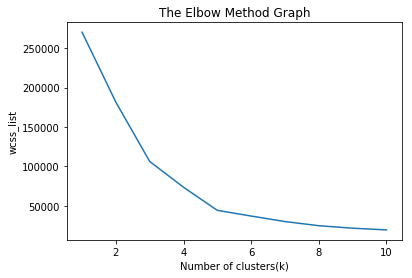

In [4]:
from sklearn.cluster import KMeans

wcss_list = [] #initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
    
mtp.plot(range(1,11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

From the above plot, we can see the elbow point is at $3$ and $5$. As we are dealing with large data-set let's **start with 3**.

### Step 3: Training the K-Means algorithm on the training dataset

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  #note: Change the number of clusters here.
y_predict = kmeans.fit_predict(x)

y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

### Step 4: Visualising the Clusters

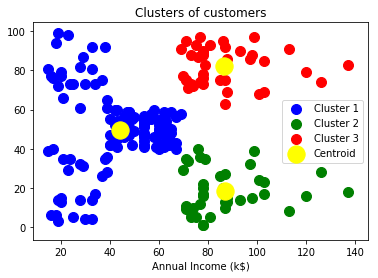

In [11]:
# we start w/ three clusters

mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label= 'Cluster 1')
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label= 'Cluster 2')
mtp.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label= 'Cluster 3')

mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.legend()
mtp.show()

---